### Confidence Intervals - Part I

First let's read in the necessary libraries and the dataset.  You also have the full and reduced versions of the data available.  The reduced version is an example of you would actually get in practice, as it is the sample.  While the full data is an example of everyone in your population.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

coffee_full = pd.read_csv('coffee_dataset.csv')
coffee_red = coffee_full.sample(200) #this is the only data you might actually get in the real world.
coffee_red.head()

,user_id,age,drinks_coffee,height
2402,2874,<21,True,64.357154
2864,3670,>=21,True,66.859636
2167,7441,<21,False,66.659561
507,2781,>=21,True,70.166241
1817,2875,>=21,True,71.369120


`1.` What is the proportion of coffee drinkers in the sample?  What is the proportion of individuals that don't drink coffee?

In [12]:
coffee_drinks = coffee_red['drinks_coffee'].mean()
coffee_drinks, 1-coffee_drinks

(0.595, 0.405)

`2.` Of the individuals who drink coffee, what is the average height? Of the individuals who do not drink coffee, what is the average height?

In [14]:
var_height_true = coffee_red[coffee_red['drinks_coffee']==True]['height'].mean()
var_height_false = coffee_red[coffee_red['drinks_coffee']==False]['height'].mean()
var_height_true, var_height_false

(68.11962990858616, 66.78492279927877)

`3.` Simulate 200 "new" individuals from your original sample of 200.  What are the proportion of coffee drinkers in your bootstrap sample?  How about individuals that don't drink coffee?

In [16]:
coffee_blue = coffee_full.sample(200)
drinkers = coffee_blue['drinks_coffee'].mean()
drinkers, 1-drinkers

(0.55, 0.44999999999999996)

`4.` Now simulate your bootstrap sample 10,000 times and take the mean height of the non-coffee drinkers in each sample. Each bootstrap sample should be from the very first sample of 200 data points. Plot the distribution, and pull the values necessary for a 95% confidence interval.  What do you notice about the sampling distribution of the mean in this example?

(array([  11.,  113.,  599., 1676., 2875., 2776., 1438.,  426.,   78.,
           8.]),
 array([65.05348487, 65.33802943, 65.62257398, 65.90711854, 66.19166309,
        66.47620765, 66.76075221, 67.04529676, 67.32984132, 67.61438588,
        67.89893043]),
 <a list of 10 Patch objects>)

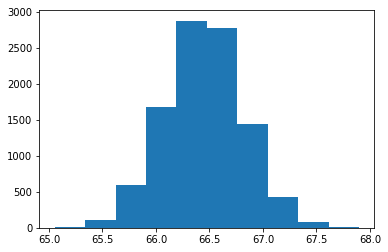

In [19]:
var_lst = []
for i in range(10000):
    coffee_sample = coffee_full.sample(200)
    mean_height_false =coffee_sample[coffee_sample['drinks_coffee']==False]['height'].mean()
    var_lst.append(mean_height_false)
plt.hist(var_lst)

In [22]:
np.percentile(var_lst, 2.5), np.percentile(var_lst, 97.5)

(65.73021838828843, 67.17382408182401)

`5.`  Did your interval capture the actual average height of non-coffee drinkers in the population?  Look at the average in the population and the two bounds provided by your 95% confidence interval, and then answer the final quiz question below.



In [23]:
coffee_full[coffee_full['drinks_coffee']==False]['height'].mean()

66.443407762147

Proporção do grupo amostral que bebe café

In [29]:
drinks = coffee_red['drinks_coffee'].mean()
drinks

0.595

Proporção do grupo amostral que não bebe café

In [30]:
1-drinks

0.405

Altura média dos membros do grupo amostral que bebe café

In [32]:
mean_height_true = coffee_red[coffee_red['drinks_coffee']==True]['height'].mean()
mean_height_true

68.11962990858616

Altura média dos membros do grupo amostral que não bebe café

In [33]:
mean_height_false = coffee_red[coffee_red['drinks_coffee']==False]['height'].mean()
mean_height_false

66.78492279927877

A proporção de bebedores de café em sua amostra bootstrap corresponde exatamente à proporção na amostra original?

In [34]:
coffee_full['drinks_coffee'].mean()

0.589778076664425

Qual o limite inferior do seu intervalo de confiança de 95% da altura média daqueles que não bebem café na população?
Qual o limite superior do seu intervalo de confiança de 95% da altura média daqueles que não bebem café na população?

In [36]:
var_lst_false = []
for i in range(10000):
    coffee_sample = coffee_full.sample(200)
    mean_height_false =coffee_sample[coffee_sample['drinks_coffee']==False]['height'].mean()
    var_lst_false.append(mean_height_false)
np.percentile(var_lst, 2.5), np.percentile(var_lst, 97.5)

(65.73021838828843, 67.17382408182401)

Qual o valor da altura média daqueles que não bebem café na população?

In [39]:
coffee_full[coffee_full['drinks_coffee']==False]['height'].mean()

66.443407762147

A altura média do grupo amostral que não bebe café é a mesma do que a altura média de quem não bebe café na população?

In [40]:
coffee_red[coffee_red['drinks_coffee']==False]['height'].mean()

66.78492279927877

Qual é a percentagem que cortamos fora de cada cauda se quisermos construir um intervalo de confiança de 98%? 1%

### Confidence Interval - Difference In Means

Here you will look through the example from the last video, but you will also go a couple of steps further into what might actually be going on with this data.

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

full_data = pd.read_csv('coffee_dataset.csv')
sample_data = full_data.sample(200)

`1.` For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for coffee and non-coffee drinkers.  Build a 99% confidence interval using your sampling distribution.  Use your interval to start answering the first quiz question below.

In [44]:
diff = []
for i in range(10000):
    sample_data = full_data.sample(200)
    drink_cof = sample_data[sample_data['drinks_coffee']==True]['height'].mean()
    drink_nocof = sample_data[sample_data['drinks_coffee']==False]['height'].mean()
    diff.append(drink_cof-drink_nocof)
np.percentile(diff, 0.5), np.percentile(diff, 99.5)    

(0.8001772403396686, 3.077608798270255)

`2.` For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for those older than 21 and those younger than 21.  Build a 99% confidence interval using your sampling distribution.  Use your interval to finish answering the first quiz question below.  

In [45]:
diff = []
for i in range(10000):
    sample_data = full_data.sample(200)
    height_old = sample_data[sample_data['age']=='>=21']['height'].mean()
    height_young = sample_data[sample_data['age']=='<21']['height'].mean()
    diff.append(height_old-height_young)
np.percentile(diff, 0.5), np.percentile(diff, 99.5)    

(3.0074066148891427, 4.784776312177173)

`3.` For 10,000 iterations bootstrap your sample data, compute the **difference** in the average height for coffee drinkers and the average height for non-coffee drinkers for individuals **under** 21 years old.  Using your sampling distribution, build a 95% confidence interval.  Use your interval to start answering question 2 below.

In [47]:
diff = []
for i in range(10000):
    sample_data = full_data.sample(200)
    sample_data = sample_data[sample_data['age']=='<21']
    drink_cof = sample_data[sample_data['drinks_coffee']==True]['height'].mean()
    drink_nocof = sample_data[sample_data['drinks_coffee']==False]['height'].mean()
    diff.append(drink_cof-drink_nocof)
np.percentile(diff, 2.5), np.percentile(diff, 97.5)    

(-2.497296053691274, -0.9155296641924616)

`4.` For 10,000 iterations bootstrap your sample data, compute the **difference** in the average height for coffee drinkers and the average height for non-coffee drinkers for individuals **over** 21 years old.  Using your sampling distribution, build a 95% confidence interval. Use your interval to finish answering the second quiz question below. As well as the following questions. 

In [48]:
diff = []
for i in range(10000):
    sample_data = full_data.sample(200)
    sample_data = sample_data[sample_data['age']=='>=21']
    drink_cof = sample_data[sample_data['drinks_coffee']==True]['height'].mean()
    drink_nocof = sample_data[sample_data['drinks_coffee']==False]['height'].mean()
    diff.append(drink_cof-drink_nocof)
np.percentile(diff, 2.5), np.percentile(diff, 97.5)    

(-3.2435677154231892, -0.6876652723081859)

Nos primeiros intervalos, você tinha evidências de que a altura média de bebedores de café era maior, mas, nos intervalos finais, você tinha evidências de que as pessoas que bebem café em cada grupo eram, na verdade, mais baixas. Isso foi um exemplo de **Paradoxo de Simpson**